# Homework 2 - Random Forests
### kjs16c
### tpj16b

This file includes analysis using random forests for four machine learning datasets. The forest size producing the most accurate classification for each dataset are summarized in a table near the bottom. 

Link to our working directory for this course: https://github.com/johansent/ML_Fall2017

In [1]:
### Import a machine learning dataset
import pandas

def import_data(path, train1, test1, train2, test2, head = 0):
    filepath = 'C:/Users/joh10/Desktop/FSU/FA17/5635/git/Data/' + path + '/'
       
    train_data = pandas.read_table(filepath + train1, sep = ' ', header = head)
    train2_data = pandas.read_table(filepath + train2, sep = ' ', header = head)
        
    test_data = pandas.read_table(filepath + test1, sep = ' ', header = head)
    test2_data = pandas.read_table(filepath + test2, sep = ' ', header = head)

    return train_data, train2_data, test_data, test2_data

In [2]:
### train decision trees of depth 1 through 12, computing the classification error at each step for both training and testing sets.
#from import_data import import_data
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt
import sklearn
import numpy as np

def grow_forest(title, legend_loc = 1):    
    %matplotlib inline  

    errorsTrain = []
    errorsTest = []
    K = [3, 10, 30, 100, 300]

    for k in K:
        clf = RandomForestClassifier(n_estimators = k)
        clf = clf.fit(X, np.ravel(Y))

        error = 1 - clf.score(X, Y)
        errorsTrain.append(error)

        error = 1-clf.score(Xtest, Ytest)
        errorsTest.append(error)

    plt.plot(K, errorsTrain, label = 'Training Error')
    plt.plot(K, errorsTest, label = 'Test Error')
    plt.xlabel('Tree Depth')
    plt.ylabel('Classification Error')
    plt.title(title)
    plt.legend(loc = legend_loc)
    plt.show()
    
    return errorsTest
    

### Madelon data

In [3]:
min_table = {}

X, Y, Xtest, Ytest = import_data('madelon', 'madelon_train.data', 'madelon_valid.data','madelon_train.labels', 'madelon_valid.labels', head = None)
X.drop(X.columns[len(X.columns)-1], axis=1, inplace=True)
Xtest.drop(Xtest.columns[len(Xtest.columns)-1], axis=1, inplace=True) #see ref [5]

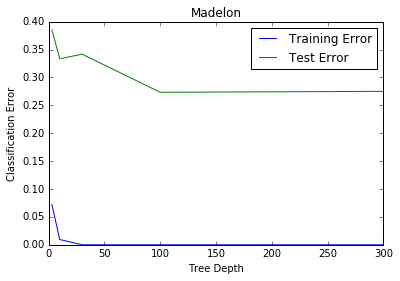

In [4]:
errorsTest = grow_forest('Madelon')
min_table['Madelon     '] = [min(errorsTest), np.argmin(errorsTest) + 1]

### Arcene data

In [5]:
X, Y, Xtest, Ytest = import_data('arcene', 'arcene_train.data', 'arcene_valid.data','arcene_train.labels', 'arcene_valid.labels', head = None)
X.drop(X.columns[len(X.columns)-1], axis=1, inplace=True)
Xtest.drop(Xtest.columns[len(Xtest.columns)-1], axis=1, inplace=True)

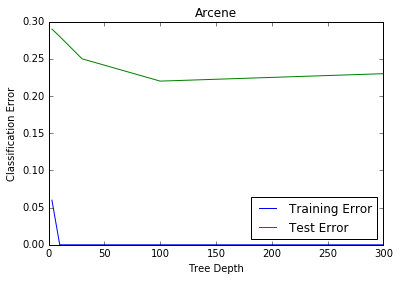

In [6]:
errorsTest = grow_forest('Arcene', legend_loc = 4)
min_table['Arcene      '] = [min(errorsTest), np.argmin(errorsTest) + 1]

### Hill/Valley data

In [7]:
X, Y, Xtest, Ytest = import_data('hill_valley', 'X.dat', 'Xtest.dat','Y.dat', 'Ytest.dat', head = None)

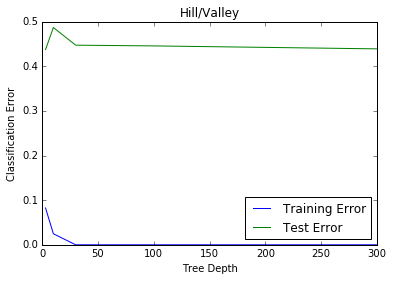

In [8]:
errorsTest = grow_forest('Hill/Valley', legend_loc = 4)
min_table['Hill/Valley '] = [min(errorsTest), np.argmin(errorsTest) + 1]

### Poker data

In [9]:
#X, Y, Xtest, Ytest = import_data('poker', 'X.dat', 'Xtest.dat','Y.dat', 'Ytest.dat', head = None)

In [10]:
#errorsTest = grow_forest('Poker')
#min_table['Poker       '] = [min(errorsTest), np.argmin(errorsTest) + 1]

### Satimage

In [11]:
X, Y, Xtest, Ytest = import_data('satimage', 'X.dat', 'Xtest.dat','Y.dat', 'Ytest.dat', head = None)

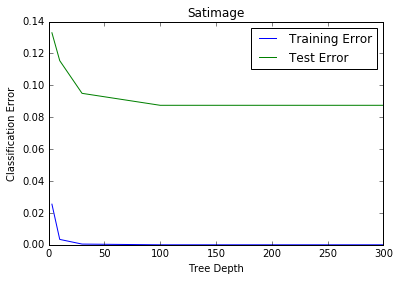

In [12]:
errorsTest = grow_forest('Satimage')
min_table['Satimage    '] = [min(errorsTest), np.argmin(errorsTest) + 1]

In [14]:
np.argmin(errorsTest)

3

## Summary of Results

In [19]:
K = [3, 10, 30, 100, 300]

print('{0:12s} {1:15s} {2:12s}'.format('Data name', 'Minimum Value', 'Number of Trees'))
print('--------------------------------------------')
for k in min_table.keys():
    print('{0:12s} {1:13f} {2:17d}'.format(k, min_table[k][0], K[min_table[k][1]-1]))


Data name    Minimum Value   Number of Trees
--------------------------------------------
Satimage          0.087500               100
Arcene            0.220000               100
Madelon           0.273333               100
Hill/Valley       0.437294                 3


## Bibliography

1. Stéfan van der Walt, S. Chris Colbert and Gaël Varoquaux. The NumPy Array: A Structure for Efficient Numerical Computation, Computing in Science & Engineering, 13, 22-30 (2011), DOI:10.1109/MCSE.2011.37
2. John D. Hunter. Matplotlib: A 2D Graphics Environment, Computing in Science & Engineering, 9, 90-95 (2007), DOI:10.1109/MCSE.2007.55
3. Wes McKinney. Data Structures for Statistical Computing in Python, Proceedings of the 9th Python in Science Conference, 51-56 (2010) 
4. Fabian Pedregosa, Gaël Varoquaux, Alexandre Gramfort, Vincent Michel, Bertrand Thirion, Olivier Grisel, Mathieu Blondel, Peter Prettenhofer, Ron Weiss, Vincent Dubourg, Jake Vanderplas, Alexandre Passos, David Cournapeau, Matthieu Brucher, Matthieu Perrot, Édouard Duchesnay. Scikit-learn: Machine Learning in Python, Journal of Machine Learning Research, 12, 2825-2830 (2011)
5. conner.xyz at https://stackoverflow.com/questions/20517650/how-to-delete-the-last-column-of-data-of-a-pandas-dataframe